# University of Anybody Can Learn Datascience 

### Requirement

##### Description:	
       Given dataset is a dummy dataset containing infor related to Grades from a PG course at ABCCD University.

##### Attributes:                        
       There are total 5 attributes Sem_enrolled,Tests,Coursera,GroupActivity and	FinalExam.
	   FinalExam is the target variable.
	
##### The recorded values are the average of sub-components: 
         e.g The Tests, coursera and group activity variables are the average of all tests, coursera courses and group activities taken by students. 
    The FinalExam variable is the average of all questions in the final, written exam.

    The Sem_enrolled column is the year in which the student first enrolled at the university and is a crude approximation of the student's age (maturity).

    This particular course permitted students to work in groups for assignments, tutorials and the take-home exam. The groups were self-selected, and varied during the semester.

    Of interest is whether the assignments, tutorials, midterms or take-home exam are a good predictor of the student's performance in the final exam.                                         
    Also, findout whether the sem_enrolled variable show any promise as a prediction variable?

Data shape:	100 rows and 5 columns                                                
Missing Values: YES                                     
Task to be performed: Missing value imputation and Regression.

### Importing Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import style

import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import pickle 

### Academic score of the University of Anybody Can Learn Datascience - ABCLD 

In [3]:
D= pd.read_excel('AcademicScoreDataset.xlsx')
Data =pd.DataFrame(D)
e = Data[(Data['Final'] >= 100) | (Data['Final'] <= 0)]
extereme =pd.DataFrame(e)
#i = Data[[(Data.Sem_enrolled == extereme['Sem_enrolled']) &( Data.Tests == extereme['Tests']) & (Data.Coursera == extereme['Coursera']) & ( Data.GroupActivity == extereme['GroupActivity']) & ( Data.Final == extereme['Final'])]]
#Data.drop(i)

In [4]:
extereme

,Sem_enrolled,Tests,Coursera,GroupActivity,Final
33,2,85.42,91.03,NaN,107.78


In [5]:
AcademicScoreDataset= pd.read_excel('AcademicScoreDataset.xlsx')

### Understanding and examine the given academic dataset to perform the effective 'EDULYTICS'


In [6]:
AcademicScoreDataset

,Sem_enrolled,Tests,Coursera,GroupActivity,Final
0,5,95.05,34.09,51.48,52.50
1,1,83.70,100.00,99.07,68.33
2,1,81.22,83.17,63.15,48.89
3,2,91.32,96.06,100.00,80.56
4,1,95.00,93.64,100.00,73.89
...,...,...,...,...,...
95,2,89.94,80.54,93.70,39.72
96,1,95.60,100.00,90.74,87.78
97,2,63.40,76.13,99.81,85.56
98,1,75.35,97.37,72.78,77.22


In [7]:
AcademicScoreDataset.describe()

,Sem_enrolled,Tests,Coursera,GroupActivity,Final
count,100.000000,97.000000,97.000000,93.000000,94.000000
mean,1.710000,85.084639,88.217938,78.777957,66.959149
std,0.956583,14.960500,13.934439,22.984082,17.704176
min,1.000000,0.000000,34.090000,16.910000,28.060000
25%,1.000000,81.220000,83.170000,63.890000,51.877500
50%,1.000000,89.940000,92.800000,87.590000,65.420000
75%,2.000000,95.000000,99.000000,97.410000,82.850000
max,5.000000,100.000000,100.000000,100.000000,107.780000


## IMPUTATION

In [8]:
Replace_DataFrame      = AcademicScoreDataset.fillna(0)
ForwardFill_DataFrame  = AcademicScoreDataset.fillna(method = 'ffill')
BackwardFill_DataFrame = AcademicScoreDataset.fillna(method = 'bfill')

### Method 1 - replacing null by zero

    In method one we're making sure that every Tests, coursera and group activity fields NaN values get replaced by ZERO.
    
    

In [9]:
Replace_DataFrame[Replace_DataFrame.notnull()]

,Sem_enrolled,Tests,Coursera,GroupActivity,Final
0,5,95.05,34.09,51.48,52.50
1,1,83.70,100.00,99.07,68.33
2,1,81.22,83.17,63.15,48.89
3,2,91.32,96.06,100.00,80.56
4,1,95.00,93.64,100.00,73.89
...,...,...,...,...,...
95,2,89.94,80.54,93.70,39.72
96,1,95.60,100.00,90.74,87.78
97,2,63.40,76.13,99.81,85.56
98,1,75.35,97.37,72.78,77.22


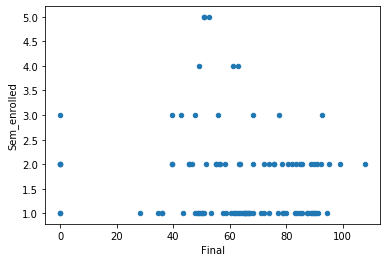

In [10]:
# Relations on enrollment 
Replace_DataFrame.plot(x = 'Final', y = 'Sem_enrolled', kind = 'scatter')

### Method 2 - backward fill imputation
        In method three - backward fill imputation, we're filling our NaN value by propagated next valid entry from respective columns Tests, coursera and group activity.
        
        NOTE: 
            - For the last row, NaN values remains unchange.
            - In order to handle that, we're using the convenience methods, 
                    -> dropna() (which removes NA values)
        

In [16]:
BackwardFill_DataFrame[BackwardFill_DataFrame.notnull()]

,Sem_enrolled,Tests,Coursera,GroupActivity,Final
0,5,95.05,34.09,51.48,52.50
1,1,83.70,100.00,99.07,68.33
2,1,81.22,83.17,63.15,48.89
3,2,91.32,96.06,100.00,80.56
4,1,95.00,93.64,100.00,73.89
...,...,...,...,...,...
95,2,89.94,80.54,93.70,39.72
96,1,95.60,100.00,90.74,87.78
97,2,63.40,76.13,99.81,85.56
98,1,75.35,97.37,72.78,77.22


In [17]:
# calculating correlation
BackwardFill_DataFrame = BackwardFill_DataFrame.dropna()

### Method 3 - KNN sklearn

In [20]:
import sklearn
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
sklearn_Data = imputer.fit_transform(AcademicScoreDataset)
sklearn_DataFrame = pd.DataFrame(sklearn_Data, columns = ['Sem_enrolled','Tests','Coursera','GroupActivity','Final'])
sklearn_DataFrame 

,Sem_enrolled,Tests,Coursera,GroupActivity,Final
0,5.0,95.050000,34.09,51.48,52.50
1,1.0,83.700000,100.00,99.07,68.33
2,1.0,81.220000,83.17,63.15,48.89
3,2.0,91.320000,96.06,100.00,80.56
4,1.0,95.000000,93.64,100.00,73.89
...,...,...,...,...,...
95,2.0,89.940000,80.54,93.70,39.72
96,1.0,95.600000,100.00,90.74,87.78
97,2.0,63.400000,76.13,99.81,85.56
98,1.0,75.350000,97.37,72.78,77.22
